In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
file_2010_2011= "data/online_retail_II.csv"
file_2009_2010 = "data/online_retail_II2.csv"

# Load datasets
data_2009_2010 = pd.read_csv(file_2009_2010)
data_2010_2011 = pd.read_csv(file_2010_2011)

# Combine both datasets
data = pd.concat([data_2009_2010, data_2010_2011], ignore_index=True) 
df = pd.DataFrame(data)
display(df.head())

# Data Cleaning and Exploration

# Remove any transactions with a negative quantity or price 
df = df[df['Quantity'] >= 0]
df = df[df['Price'] >= 0]

# Remove test transactions
df = df[~df["StockCode"].str.contains("TEST")]

# Remove canceled transactions 
df = df[~df['Invoice'].str.startswith('C', na=False)]

# Convert customer ID to int 
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

# Add other useful options for analysis
df['TotalSales'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceTime'] = df['InvoiceDate'].dt.time
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
#df['InvoiceDate'] = df['InvoiceDate'].dt.date

# Eliminate duplicates
df.drop_duplicates(inplace=True)

display(df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,InvoiceTime,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,07:45:00,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,07:45:00,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,07:45:00,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,07:45:00,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,07:45:00,Tuesday


Country
United Kingdom          928619
EIRE                     17159
Germany                  16440
France                   13640
Netherlands               5090
Spain                     3663
Switzerland               3123
Belgium                   3056
Portugal                  2470
Australia                 1792
Channel Islands           1551
Italy                     1442
Sweden                    1336
Norway                    1290
Cyprus                    1136
Finland                   1032
Austria                    922
Denmark                    778
Unspecified                748
Greece                     657
Poland                     504
Japan                      468
United Arab Emirates       467
USA                        409
Israel                     366
Hong Kong                  354
Singapore                  339
Malta                      282
Canada                     228
Iceland                    222
RSA                        168
Lithuania                  154


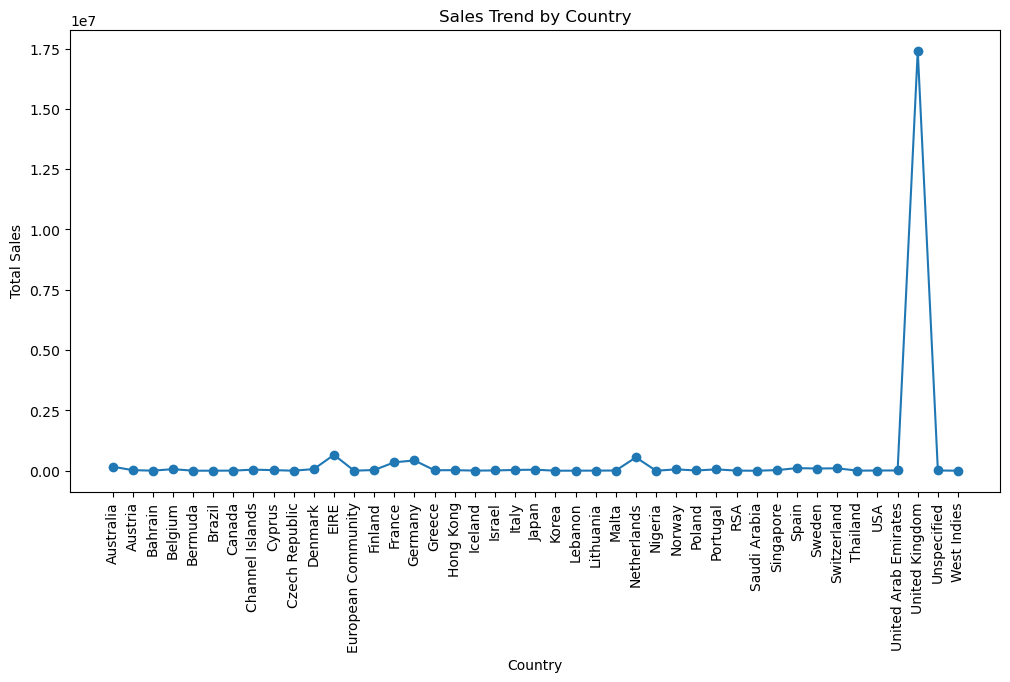

In [11]:
# Customer Demographics
# Distribution of Transaction per Country
display(df['Country'].value_counts())
df_country = df.groupby('Country').agg(
    total_quantity=('Quantity', 'sum'),
    total_sales=('TotalSales', 'sum'),
).reset_index()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(df_country['Country'].astype(str), df_country['total_sales'], marker='o')
plt.title("Sales Trend by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [12]:
df_grouped = df[df['Customer ID'] != 0]
df_grouped = df_grouped.groupby(['Customer ID']).agg(
    total_trans=('Invoice', 'count'),
    total_quantity=('Quantity', 'sum'),
    total_sales=('TotalSales', 'sum')
).reset_index()
display(df_grouped)
display(df_grouped.describe())

,Customer ID,total_trans,total_quantity,total_sales
0,12346,25,74239,77352.96
1,12347,222,2967,4921.53
2,12348,51,2714,2019.40
3,12349,175,1624,4428.69
4,12350,17,197,334.40
...,...,...,...,...
5874,18283,938,1679,2664.90
5875,18284,28,494,461.68
5876,18285,12,145,427.00
5877,18286,67,608,1296.43


,Customer ID,total_trans,total_quantity,total_sales
count,5879.000000,5879.000000,5879.000000,5879.000000
mean,15314.963259,132.587685,1790.890287,2955.362862
std,1715.636967,342.203171,8883.391212,14439.497874
min,12346.000000,1.000000,1.000000,0.000000
25%,13832.500000,20.000000,187.000000,342.230000
50%,15314.000000,52.000000,480.000000,867.110000
75%,16797.500000,138.000000,1350.500000,2248.110000
max,18287.000000,12435.000000,367833.000000,580987.040000


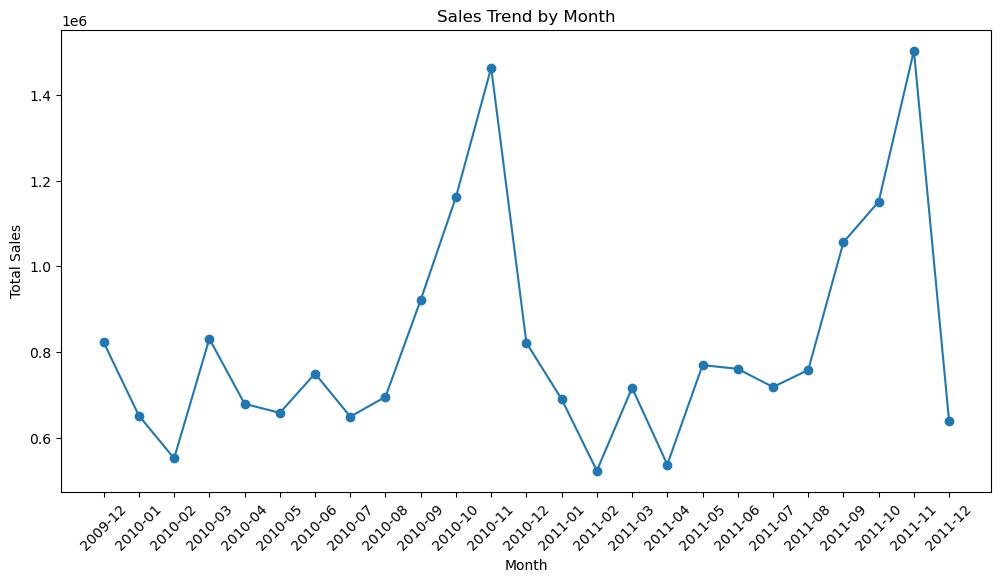

In [13]:
# Group sales by day
df['Month'] = df['InvoiceDate'].dt.to_period('M')
# Group by Month and calculate total sales (Quantity * UnitPrice)

df_monthly_sales = df.groupby('Month').agg(
    total_sales=('TotalSales', 'sum'),
    total_quantity=('Quantity', 'sum'),
).reset_index()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sales['Month'].astype(str), df_monthly_sales['total_sales'], marker='o')
plt.title("Sales Trend by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

  CustomerCategory  Number of Purchases
0            Guest               231038
1       Registered               779483


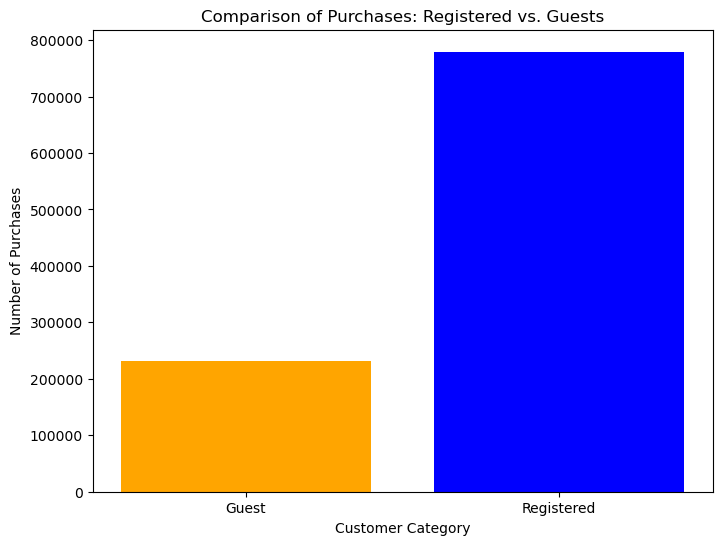

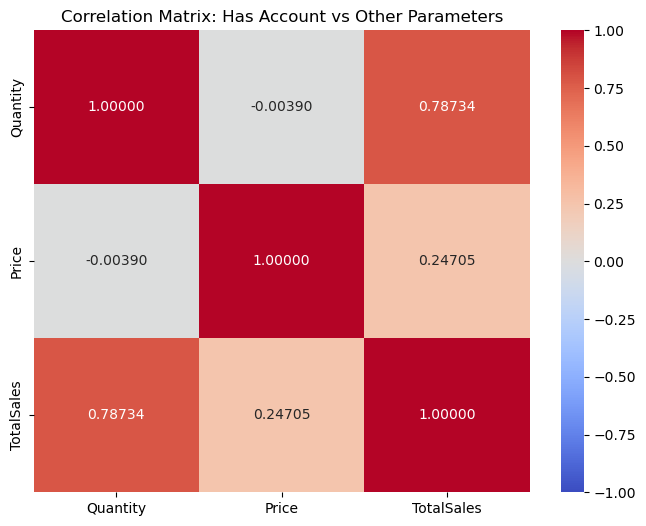

In [14]:
# Create a new column to categorize customers
df['CustomerCategory'] = df['Customer ID'].apply(lambda x: 'Guest' if x == 0 else 'Registered')

# Count the number of purchases for each category
purchase_counts = df.groupby('CustomerCategory').size().reset_index(name='Number of Purchases')

# Display the counts
print(purchase_counts)

# Visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(purchase_counts['CustomerCategory'], purchase_counts['Number of Purchases'], color=['orange', 'blue'])
plt.title('Comparison of Purchases: Registered vs. Guests')
plt.ylabel('Number of Purchases')
plt.xlabel('Customer Category')
plt.show()

correlation_data = df[['Quantity', 'Price', 'TotalSales']]

# Step 4: Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f', vmin=-1, vmax=1)
plt.title("Correlation Matrix: Has Account vs Other Parameters")
plt.show()

##

# Customer Segmentation

Cluster Summary:
           Recency  Frequency  Monetary
Cluster                               
0        0.049665   0.001994  0.001808
1        0.554051   0.000347  0.000320
2        0.282705   0.000558  0.000453
3        0.840673   0.000111  0.000198
Customer Clusters:
    Customer ID  Cluster
0            0        0
1        12346        1
2        12347        0
3        12348        0
4        12349        0


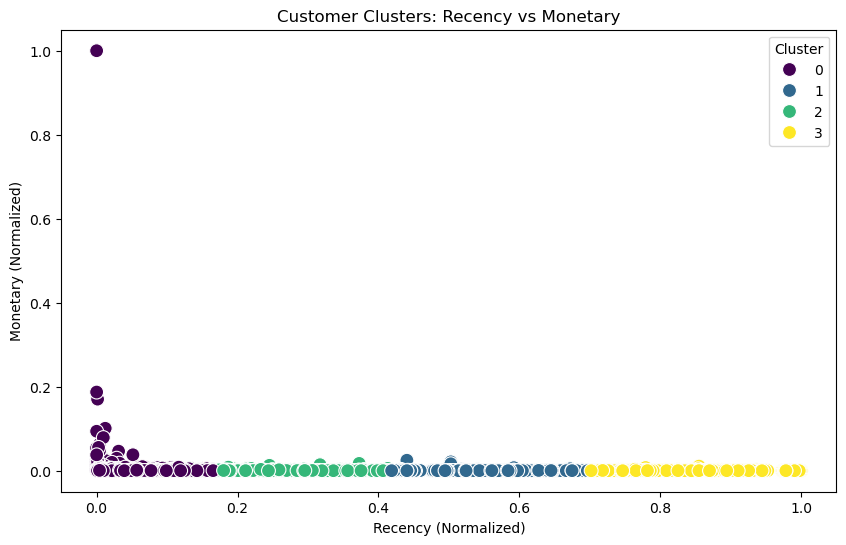

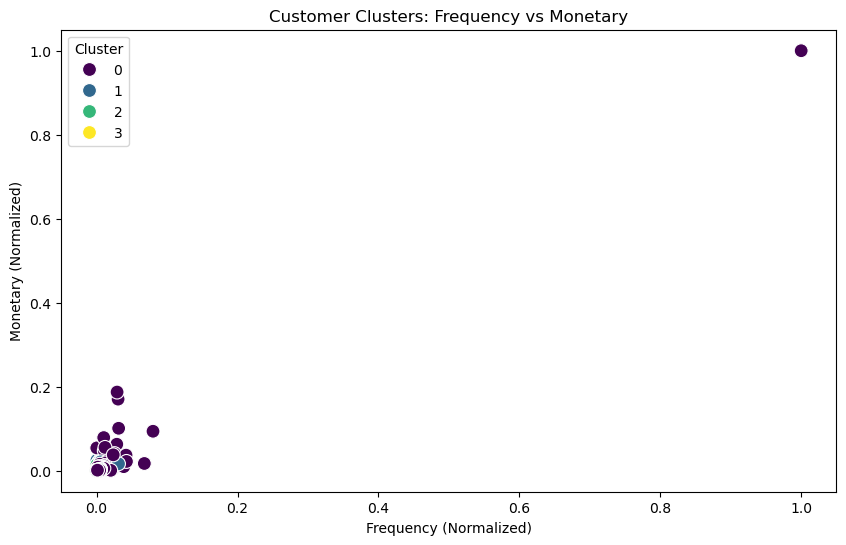

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 2: Define reference date
reference_date = df['InvoiceDate'].max()

# Step 3: Calculate RFM metrics
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                     # Frequency
    'TotalSales': 'sum'                                       # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalSales': 'Monetary'
}).reset_index()

# Step 4: Normalize RFM metrics
scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 6: Analyze clusters (exclude Customer ID from summary)
cluster_summary = rfm.groupby('Cluster').mean()[['Recency', 'Frequency', 'Monetary']]
print("Cluster Summary:\n", cluster_summary)

# Step 7: Map customers to clusters
customer_clusters = rfm[['Customer ID', 'Cluster']]
print("Customer Clusters:\n", customer_clusters.head())

# Step 8: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters: Recency vs Monetary')
plt.xlabel('Recency (Normalized)')
plt.ylabel('Monetary (Normalized)')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters: Frequency vs Monetary')
plt.xlabel('Frequency (Normalized)')
plt.ylabel('Monetary (Normalized)')
plt.legend(title='Cluster')
plt.show()




### Optimized Communication Times

C:\Users\nicho\AppData\Local\Temp\ipykernel_6588\130423678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clusters['Customer ID'] = customer_clusters['Customer ID'].astype(int)


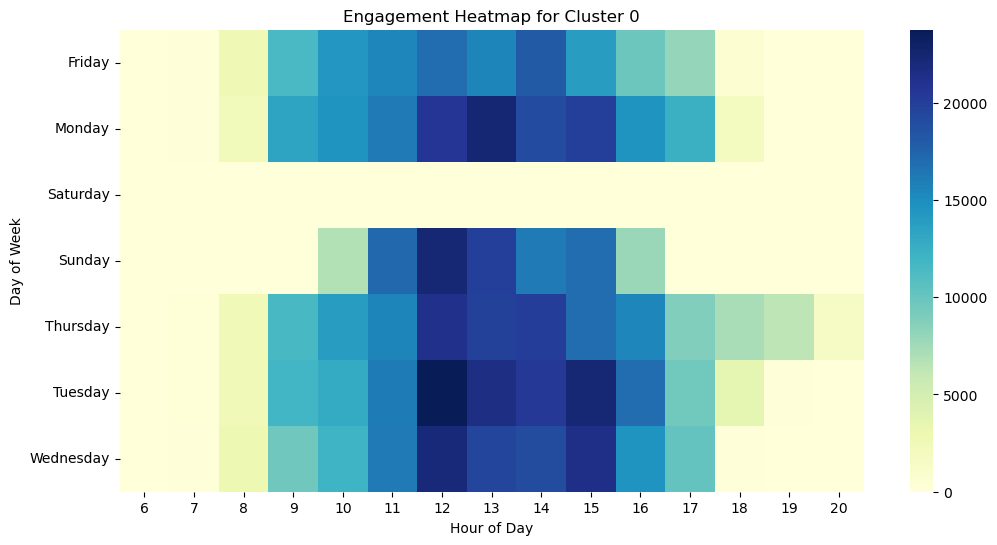

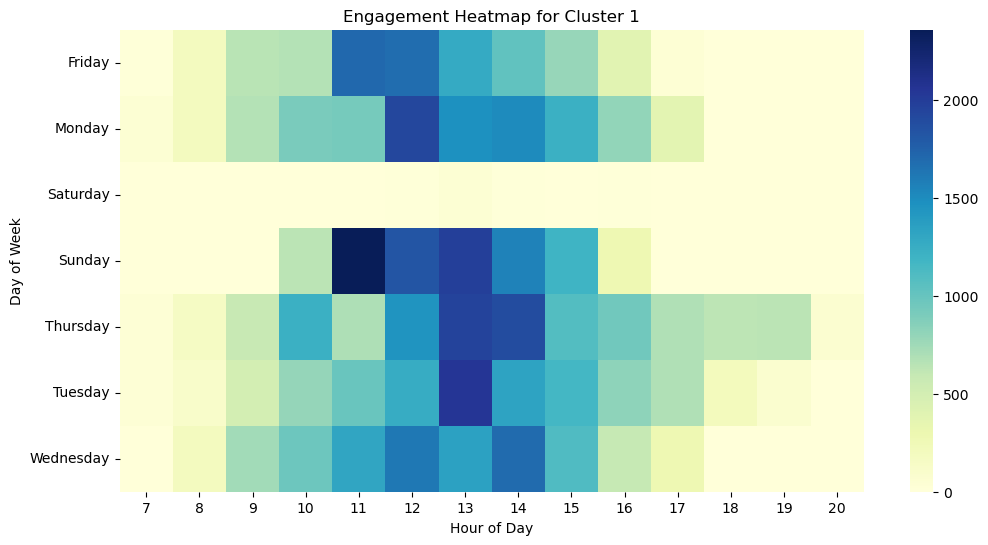

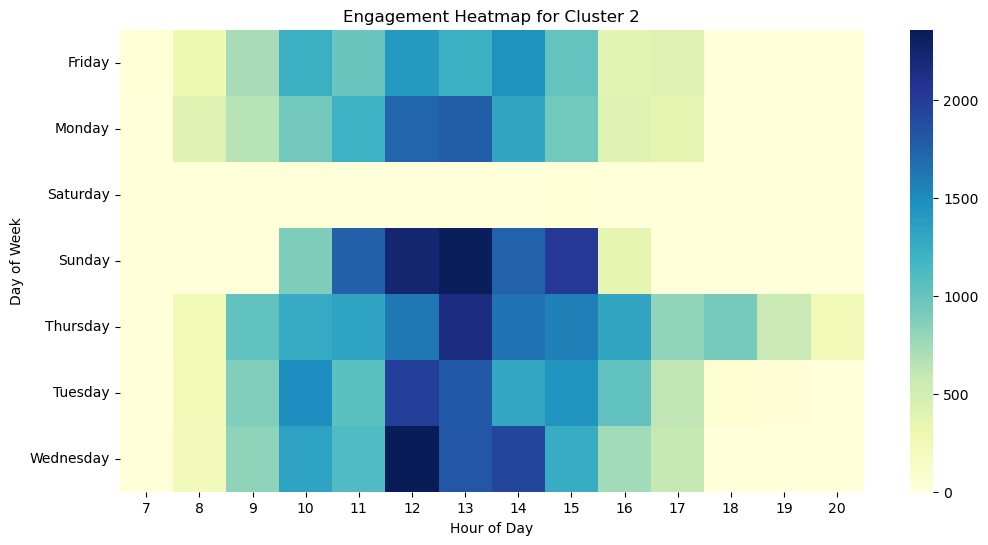

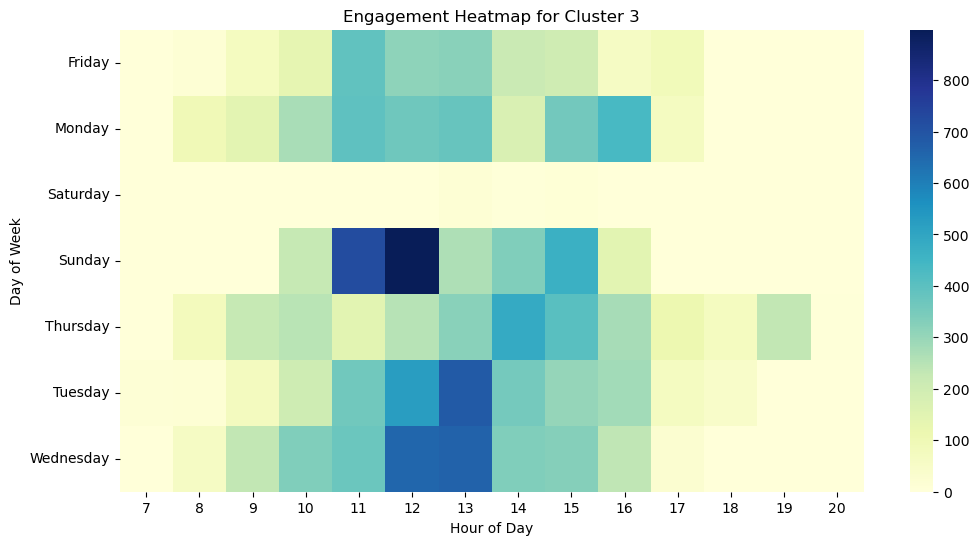

In [16]:
# Ensure Customer ID columns are of the same type
df['Customer ID'] = df['Customer ID'].astype(int)
customer_clusters['Customer ID'] = customer_clusters['Customer ID'].astype(int)

# Merge clusters into the main DataFrame
df = df.merge(customer_clusters, on='Customer ID', how='left')

# Check if Cluster column is present and handle missing values
df['Cluster'] = df['Cluster'].fillna(-1).astype(int)

# Add DayOfWeek and Hour features
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Group data by Cluster, DayOfWeek, and Hour
cluster_timing = df.groupby(['Cluster', 'DayOfWeek', 'Hour']).size().reset_index(name='Counts')

# Plot engagement heatmaps for each cluster
for cluster in cluster_timing['Cluster'].unique():
    plt.figure(figsize=(12, 6))
    cluster_data = cluster_timing[cluster_timing['Cluster'] == cluster]
    heatmap_data = cluster_data.pivot_table(index='DayOfWeek', columns='Hour', values='Counts', aggfunc='sum', fill_value=0)

    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
    plt.title(f"Engagement Heatmap for Cluster {cluster}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.show()


### Sales Forecasting

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Add relevant time-based features
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['TotalSales'] = df['Quantity'] * df['Price']

# Aggregate data by YearMonth
monthly_sales = df.groupby('YearMonth').agg(
    total_sales=('TotalSales', 'sum'),
    total_quantity=('Quantity', 'sum'),
    avg_transaction_size=('TotalSales', 'mean'),
    frequency=('Invoice', 'nunique')  # Unique invoices in each month
).reset_index()

# Display aggregated data
print("Aggregated Monthly Sales Data:")
print(monthly_sales.head())

# Features and Target
X = monthly_sales[['total_quantity', 'avg_transaction_size', 'frequency']]
y = monthly_sales['total_sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared: {r2}")


Aggregated Monthly Sales Data:
  YearMonth  total_sales  total_quantity  avg_transaction_size  frequency
0   2009-12   822370.450          444314             18.856085       1833
1   2010-01   651065.112          395214             21.405350       1201
2   2010-02   551504.726          391850             19.673411       1279
3   2010-03   830915.261          530314             20.796798       1770
4   2010-04   678852.752          385742             20.606264       1511
Mean Absolute Error (MAE): 186864.61781600007
R-Squared: 0.635203914347467



Low Sales Periods:
   YearMonth  total_sales
1    2010-01   651065.112
2    2010-02   551504.726
7    2010-07   648810.270
14   2011-02   522545.560
16   2011-04   536968.491
24   2011-12   637808.330

Off-Peak Hours:
    Hour  total_sales  total_quantity
0      6         4.25               1
1      7     75765.57           44875
13    19    126830.35           71095
14    20     38904.19           21334


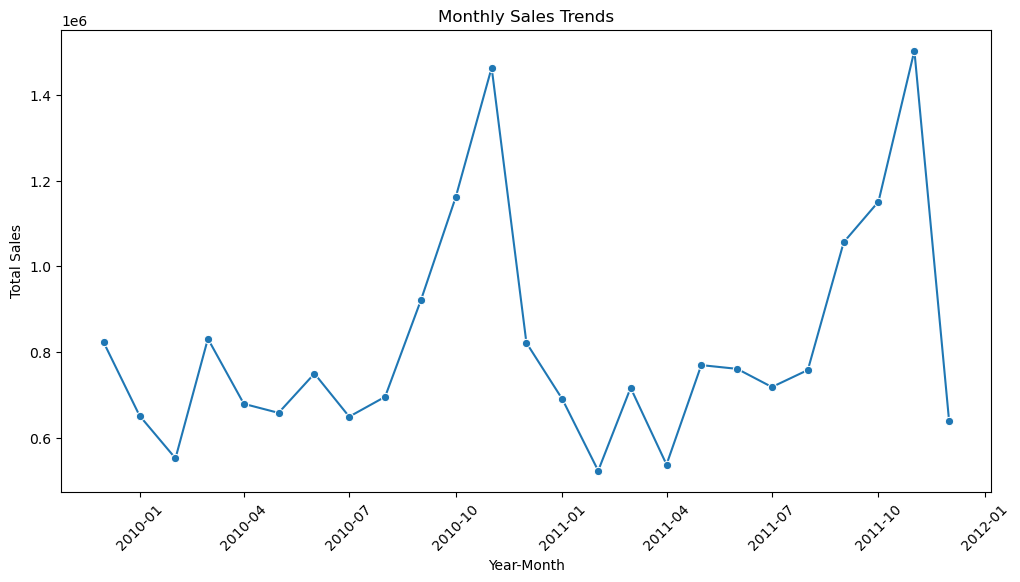

C:\Users\nicho\AppData\Local\Temp\ipykernel_6588\3315831473.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales, x='Hour', y='total_sales', palette='coolwarm')


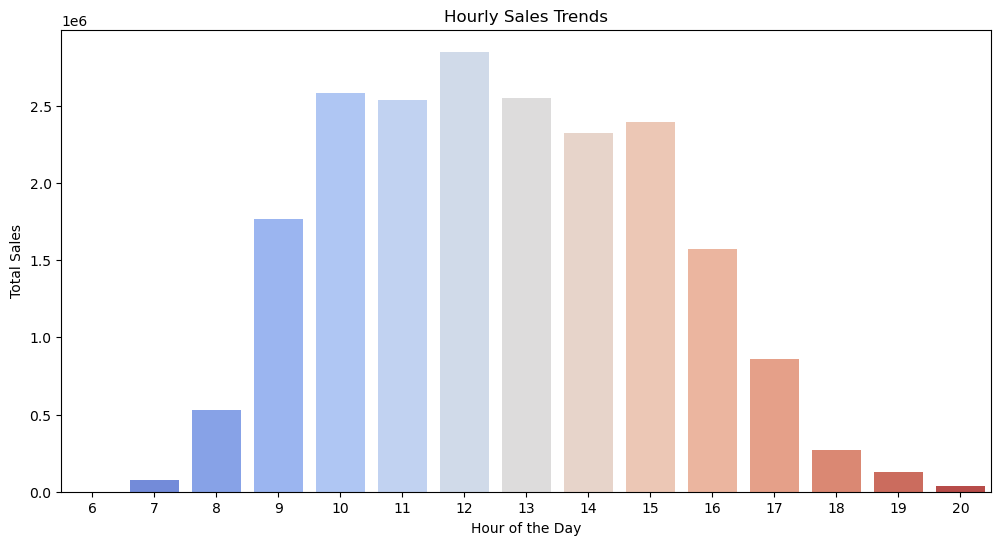


Seasonal Discount Recommendations:
Recommend offering discounts during 2010-01 to boost sales.
Recommend offering discounts during 2010-02 to boost sales.
Recommend offering discounts during 2010-07 to boost sales.
Recommend offering discounts during 2011-02 to boost sales.
Recommend offering discounts during 2011-04 to boost sales.
Recommend offering discounts during 2011-12 to boost sales.

Off-Peak Hour Discount Recommendations:
Recommend offering discounts during 6.0 hour to increase sales.
Recommend offering discounts during 7.0 hour to increase sales.
Recommend offering discounts during 19.0 hour to increase sales.
Recommend offering discounts during 20.0 hour to increase sales.


In [20]:
# Identify low sales months
low_sales = monthly_sales[monthly_sales['total_sales'] < monthly_sales['total_sales'].quantile(0.25)]
print("\nLow Sales Periods:")
print(low_sales[['YearMonth', 'total_sales']])

# Aggregate sales by hour
hourly_sales = df.groupby('Hour').agg(
    total_sales=('TotalSales', 'sum'),
    total_quantity=('Quantity', 'sum'),
).reset_index()

# Identify off-peak hours
off_peak_hours = hourly_sales[hourly_sales['total_sales'] < hourly_sales['total_sales'].quantile(0.25)]
print("\nOff-Peak Hours:")
print(off_peak_hours)

# Convert YearMonth to datetime for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='total_sales', marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


# Plot hourly sales trends
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='Hour', y='total_sales', palette='coolwarm')
plt.title("Hourly Sales Trends")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.show()

# Recommendations for low-sales months
print("\nSeasonal Discount Recommendations:")
for _, row in low_sales.iterrows():
    print(f"Recommend offering discounts during {row['YearMonth']} to boost sales.")

# Recommendations for off-peak hours
print("\nOff-Peak Hour Discount Recommendations:")
for _, row in off_peak_hours.iterrows():
    print(f"Recommend offering discounts during {row['Hour']} hour to increase sales.")
